# Zuber Data Analysis

**The objective for this analysis is to 1) analyze competitor ride service data using exploratory data analysis and 2) test the hypothesis of whether ride frequency is impacted by weather using statistical data analysis**

**The data for EDA is from two separate dataframes and will be analyzed using the following steps:**

1) Import the files and study the data for correctness

2) Identify the top 10 neighborhoods in terms of drop-offs

3) Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

4) draw conclusions based on each graph and explain the results

**The data for SDA is from one dataframe and will address the hypothesis:**
1) "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

## Exploratory Data Analysis

### Import the files and study the data for correctness

In [1]:
import pandas as pd
name_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
try:
    display(name_trips.head(10), name_trips.info() )
except:
    display('cannot read csv')
#The data is readable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


None

In [2]:
loc_avgtrip = pd.read_csv('/datasets/project_sql_result_04.csv')
try:
    display(loc_avgtrip.head(10), loc_avgtrip.info())
except:
    display('cannot read csv')
#data is readable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


None

In [3]:
taxi_weather_data = pd.read_csv('/datasets/project_sql_result_07.csv')
try:
    display(taxi_weather_data.head(10), taxi_weather_data.info())
except:
    display('cannot read csv')
taxi_weather_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


None

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [4]:
#Average_trips should be int type
loc_avgtrip['average_trips'] = loc_avgtrip['average_trips'].astype('int')
loc_avgtrip['average_trips'].head(10)

0    10727
1     9523
2     6664
3     5163
4     2546
5     2420
6     2068
7     1510
8     1364
9     1259
Name: average_trips, dtype: int64

In [5]:
#Checking df's for duplicated rows
display(name_trips.duplicated().sum(), 
        loc_avgtrip.duplicated().sum(), taxi_weather_data.duplicated().sum())

0

0

197

In [6]:
#Checking both df's for duplicated values in specific columns
display(name_trips['company_name'].duplicated().sum(),
        loc_avgtrip.duplicated().sum(), 
        taxi_weather_data['weather_conditions'].value_counts())

0

0

Good    888
Bad     180
Name: weather_conditions, dtype: int64

In [7]:
#Double checking for null-values
display(name_trips.isnull().sum(), loc_avgtrip.isnull().sum(), taxi_weather_data.isnull().sum())

company_name    0
trips_amount    0
dtype: int64

dropoff_location_name    0
average_trips            0
dtype: int64

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

**Conclusion 1.1 Data Correctness**

1) The dataframes are readable after using try-except block

2) The name_trips df contains two columns (company_name and trips_amount) and 64 rows (index 0-63)

3) The name_trips df has the correct data types

4) The loc_avgtrip df has two columns (dropoff_location_name and average_trips) and 94 rows (index 0-93)

5) The loc_avgtrip df has the correct data types

6) Both df's lacked missing values, duplicate rows, and duplicated values for name specific columns

### Identify the top 10 neighborhoods in terms of drop-offs

In [8]:
top_ten_hoods = loc_avgtrip.sort_values(by='average_trips', ascending=False).head(10)
top_ten_hoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


**Conclusion 1.2**

1) The table in the previous cell displays the top 10 neighborhoods with the most trips

2) Loop has the most drop-offs at 10,727 and Sheffield & DePaul has the lowest drop-offs at 1,259

### Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

<function matplotlib.pyplot.show(*args, **kw)>

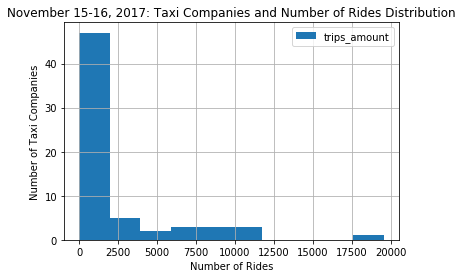

In [9]:
import matplotlib.pyplot as plt
ax = name_trips.plot(kind='hist', grid=True)
ax.set_ylabel('Number of Taxi Companies')
ax.set_xlabel('Number of Rides')
ax.set_title('November 15-16, 2017: Taxi Companies and Number of Rides Distribution')
plt.show

**Conclusion 1.3**

1) The graph above shows the distribution of taxi companies and number of rides

2) This shows that most companies achieved below 2000 rides in November 15-16 of 2017 and there's a large gap between the lowest and highest rides achieved

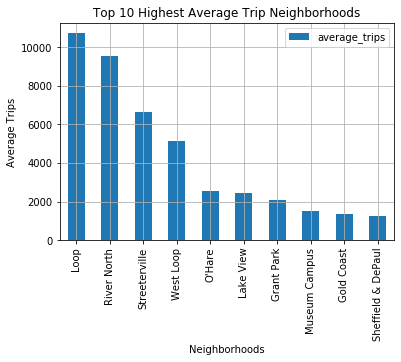

In [10]:
#top_ten_hoods graph
ax = top_ten_hoods.plot(kind='bar', x='dropoff_location_name', grid=True)
ax.set_title('Top 10 Highest Average Trip Neighborhoods')
ax.set_ylabel('Average Trips')
ax.set_xlabel('Neighborhoods')
plt.show()

**Conclusion 1.4**

1) This graph shows that Loop achieved the highest number of trips with over 10,000 trips

2) Sheffield & DePaul had the lowest number of rides close to ~1700 trips

3) The top 4 neighborhoods have more distinguished peaks with Streeterville and West loop in a medium range (6250 - 4500) and the rest of the neighborhoods to the right of the graph are in a lower range (~2250 and below)

### EDA General Conclusion

1) It was found that most of the competition had ride counts at ~2250. This number will give Zuber an idea of how many rides they can achieve in two days and should adjust their pricing according to this number as a newer taxi service.

2) The neighborhoods with the highest average trips were Loop, River North, Streeterville, and West Loop. In order for Zuber to gain more exposure, marketing should focus advertising to these neighborhoods with greater ride activity.

## Statistical Data Analysis

1) Alt hypothesis: The average duration of rides from the Loop to O'Hare International Airport **changes** on rainy Saturdays.

2) Null hypothesis: The average duration of rides from the Loop to O'Hare International Airport **does not change** on rainy Saturdays.

### First convert start_ts to date time and create a weekday column

In [11]:
from datetime import datetime
taxi_weather_data['start_ts'] = [datetime.strptime(x,'%Y-%m-%d %H:%M:%S') for x in
                                taxi_weather_data['start_ts']]
#^^^ Converts list of dates to datetime, which allows for datetime 'weekday' attribute usage

taxi_weather_data['weekday'] = taxi_weather_data['start_ts'].dt.day_name()
display(taxi_weather_data.head(10), taxi_weather_data['weekday'].value_counts())

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
5,2017-11-11 04:00:00,Good,1320.0,Saturday
6,2017-11-04 16:00:00,Bad,2969.0,Saturday
7,2017-11-18 11:00:00,Good,2280.0,Saturday
8,2017-11-11 14:00:00,Good,2460.0,Saturday
9,2017-11-11 12:00:00,Good,2040.0,Saturday


Saturday    1068
Name: weekday, dtype: int64

**Conclusion 2.1**

1) The start_ts column was a list of dates, which does not allow for traditional datetime conversion. The strptime method was used instead 

2) All days in the dataframe were Saturdays since Saturday was the only value found in the weekday column

### Create two populations: "Good" Saturdays and "Bad" Saturdays

In [12]:
#good_sat
good_sat = taxi_weather_data.loc[taxi_weather_data['weather_conditions'] == 'Good']
good_sat = good_sat.drop(['weekday', 'weather_conditions', 'start_ts'], axis=1)
display(good_sat.head(10), good_sat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 1 columns):
duration_seconds    888 non-null float64
dtypes: float64(1)
memory usage: 13.9 KB


,duration_seconds
0,2410.0
1,1920.0
2,1543.0
3,2512.0
4,1440.0
5,1320.0
7,2280.0
8,2460.0
9,2040.0
10,1500.0


None

In [13]:
#bad_sat
bad_sat = taxi_weather_data.loc[taxi_weather_data['weather_conditions'] == 'Bad']
bad_sat = bad_sat.drop(['weekday', 'weather_conditions', 'start_ts'], axis=1)
display(bad_sat.head(10), bad_sat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 1 columns):
duration_seconds    180 non-null float64
dtypes: float64(1)
memory usage: 2.8 KB


,duration_seconds
6,2969.0
30,1980.0
34,2460.0
51,2760.0
52,2460.0
54,1440.0
65,2363.0
70,3000.0
78,3120.0
92,1511.0


None

**Conclusion 2.2**

1) Two populations have been created for statistical t-test: 'good_sat' and 'bad_sat'

2) There are 888 'Good' Saturdays and 180 'Bad' Saturdays

3) Columns have been dropped that are not relevant for statistical analysis

### t-test:

1) Alt hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

2) Null hypothesis: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

In [14]:
from scipy import stats as st

alpha = 0.05 #most understood and accepted alpha value

results = st.ttest_ind(good_sat, bad_sat)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  [6.51797033e-12]
We reject the null hypothesis


**Conclusion 2.3** 

1) The t-test for good_sat and bad_sat indicated a p-value of 6.52 e-12, which is much less than the alpha value 0.05

2) This means we reject the null hypothesis and accept the alt hypothesis: The average duration of rides from the Loop to O'Hare International Airport **changes** on rainy Saturdays.

## General Conclusion

1) The EDA results indicated the top 10 neighborhoods for average number trips. The neighborhoods with the highest activity should be Zuber's main focus to gain the most exposure and activity.

2) Zuber should carefully consider the number of rides and number of taxi company distribution when calculating certain business facets, such as profit margin and services to be hired.

3) The SDA results revealed a significant change in ride duration on rainy Saturdays; Zuber should consider weather and seasonal factors as important when discerning annual budgeting.